In [1]:
import os, glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

from skimage import exposure
from scipy.ndimage.interpolation import zoom
from pydicom import dcmread

In [18]:
sot_dir = r'N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\dicoms\FLINT_SOT'
nii_output = r'N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\nii files\FLINT_SOT_NII'

In [3]:
patient_folders = os.listdir(r'N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\nii files\FLINT_EOT_NII')
print(patient_folders), len(patient_folders)

['f_2421.nii', 'f_2422.nii', 'f_2423.nii', 'f_2429.nii', 'f_2433.nii', 'f_2440.nii', 'f_2481.nii', 'f_3283.nii', 'f_3284.nii', 'f_3290.nii', 'f_3297.nii', 'f_3300.nii', 'f_3325.nii', 'f_3328.nii', 'f_3334.nii', 'f_3339.nii', 'f_3342.nii', 'f_3345.nii', 'f_3346.nii', 'f_4032.nii', 'f_4069.nii', 'f_4088.nii', 'f_4093.nii', 'f_4103.nii', 'f_4153.nii', 'f_4156.nii', 'f_4176.nii', 'f_4326.nii', 'f_4329.nii', 'f_4333.nii', 'f_4335.nii', 'f_4336.nii', 'f_5084.nii', 'f_5175.nii', 'f_5338.nii', 'f_5376.nii', 'f_5390.nii', 'f_5391.nii', 'f_5392.nii', 'f_5394.nii', 'f_5397.nii', 'f_5398.nii', 'f_5405.nii', 'f_5442.nii', 'f_5443.nii', 'f_5445.nii', 'f_5446.nii', 'f_5447.nii', 'f_5448.nii', 'f_5449.nii', 'f_5458.nii', 'f_5468.nii', 'f_5471.nii', 'f_5478.nii', 'f_5480.nii', 'f_5483.nii', 'f_5488.nii', 'f_6254.nii', 'f_6261.nii', 'f_6262.nii', 'f_6269.nii', 'f_6273.nii', 'f_7089.nii', 'f_7120.nii', 'f_7274.nii', 'f_7282.nii', 'f_7295.nii', 'f_7314.nii', 'f_7315.nii', 'f_7316.nii', 'f_7318.nii', 'f_73

(None, 84)

In [58]:
patient_id = 'f_8391'
#patient_id = patient_folders[31]

folder_path = os.path.join(sot_dir, patient_id)

dcm_list = []

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".dcm"):
            dcm_list.append(os.path.join(root, file))
            
data = {}
data['mag5_dcm_path'] = []
data['slice_location'] = []

for i in dcm_list:
    dcm = dcmread(i)
    echo_num = dcm.EchoNumbers
    data['mag5_dcm_path'].append(i)
    data['slice_location'].append(dcm.SliceLocation)

data = pd.DataFrame.from_dict(data)

print(data.to_string())

                                                                                                       mag5_dcm_path  slice_location
0   N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\dicoms\FLINT_SOT\f_8391\SIX_ECHO_FA_10_16\IM-0029-0033.dcm           175.0
1   N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\dicoms\FLINT_SOT\f_8391\SIX_ECHO_FA_10_16\IM-0029-0034.dcm           185.0
2   N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\dicoms\FLINT_SOT\f_8391\SIX_ECHO_FA_10_16\IM-0029-0035.dcm           195.0
3   N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\dicoms\FLINT_SOT\f_8391\SIX_ECHO_FA_10_16\IM-0029-0036.dcm           205.0
4   N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\dicoms\FLINT_SOT\f_8391\SIX_ECHO_FA_10_16\IM-0029-0037.dcm           215.0
5   N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\dicoms\FLINT_SOT\f_8391\SIX_ECHO_FA_10_16\IM-0029-0038.dcm           225.0
6   N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\dicoms\FLIN

In [62]:
# VERIFY CORRECT SLICE LOCATIONS

high = list(data['slice_location'][:8])
#midhigh = list(data['slice_location'][8:15])
#midlow = list(data['slice_location'][16:22])
low = list(data['slice_location'][16:21])
lower = list(data['slice_location'][8:13])

series = sorted(high + low + lower)
series, print(len(series))

18


([75.0,
  85.0,
  95.0,
  105.0,
  115.0,
  125.0,
  135.0,
  145.0,
  155.0,
  165.0,
  175.0,
  185.0,
  195.0,
  205.0,
  215.0,
  225.0,
  235.0,
  245.0],
 None)

In [63]:
high = data['mag5_dcm_path'][0:8]
#midhigh = data['mag5_dcm_path'][8:15]
#midlow = data['mag5_dcm_path'][16:22]
low = data['mag5_dcm_path'][16:21]
lower = data['mag5_dcm_path'][8:13]

series = list(low.append(lower).append(high))
#series = list(high.append(low))
series, print(len(series))

18


(['N:\\2_Analysis\\automated_analysis\\Flint_SOT_EOT_volume\\dicoms\\FLINT_SOT\\f_8391\\SIX_ECHO_FA_10_18\\IM-0031-0033.dcm',
  'N:\\2_Analysis\\automated_analysis\\Flint_SOT_EOT_volume\\dicoms\\FLINT_SOT\\f_8391\\SIX_ECHO_FA_10_18\\IM-0031-0034.dcm',
  'N:\\2_Analysis\\automated_analysis\\Flint_SOT_EOT_volume\\dicoms\\FLINT_SOT\\f_8391\\SIX_ECHO_FA_10_18\\IM-0031-0035.dcm',
  'N:\\2_Analysis\\automated_analysis\\Flint_SOT_EOT_volume\\dicoms\\FLINT_SOT\\f_8391\\SIX_ECHO_FA_10_18\\IM-0031-0036.dcm',
  'N:\\2_Analysis\\automated_analysis\\Flint_SOT_EOT_volume\\dicoms\\FLINT_SOT\\f_8391\\SIX_ECHO_FA_10_18\\IM-0031-0037.dcm',
  'N:\\2_Analysis\\automated_analysis\\Flint_SOT_EOT_volume\\dicoms\\FLINT_SOT\\f_8391\\SIX_ECHO_FA_10_17\\IM-0030-0033.dcm',
  'N:\\2_Analysis\\automated_analysis\\Flint_SOT_EOT_volume\\dicoms\\FLINT_SOT\\f_8391\\SIX_ECHO_FA_10_17\\IM-0030-0034.dcm',
  'N:\\2_Analysis\\automated_analysis\\Flint_SOT_EOT_volume\\dicoms\\FLINT_SOT\\f_8391\\SIX_ECHO_FA_10_17\\IM-0030-003

In [51]:
dicoms1 = series[0:16]
dicoms2 = series[16:]

dicoms1, dicoms2

(['N:\\2_Analysis\\automated_analysis\\Flint_SOT_EOT_volume\\dicoms\\FLINT_SOT\\f_7325\\LQ_High_4\\IM-0412-0065.dcm',
  'N:\\2_Analysis\\automated_analysis\\Flint_SOT_EOT_volume\\dicoms\\FLINT_SOT\\f_7325\\LQ_High_4\\IM-0412-0066.dcm',
  'N:\\2_Analysis\\automated_analysis\\Flint_SOT_EOT_volume\\dicoms\\FLINT_SOT\\f_7325\\LQ_High_4\\IM-0412-0067.dcm',
  'N:\\2_Analysis\\automated_analysis\\Flint_SOT_EOT_volume\\dicoms\\FLINT_SOT\\f_7325\\LQ_High_4\\IM-0412-0068.dcm',
  'N:\\2_Analysis\\automated_analysis\\Flint_SOT_EOT_volume\\dicoms\\FLINT_SOT\\f_7325\\LQ_High_4\\IM-0412-0069.dcm',
  'N:\\2_Analysis\\automated_analysis\\Flint_SOT_EOT_volume\\dicoms\\FLINT_SOT\\f_7325\\LQ_High_4\\IM-0412-0070.dcm',
  'N:\\2_Analysis\\automated_analysis\\Flint_SOT_EOT_volume\\dicoms\\FLINT_SOT\\f_7325\\LQ_High_4\\IM-0412-0071.dcm',
  'N:\\2_Analysis\\automated_analysis\\Flint_SOT_EOT_volume\\dicoms\\FLINT_SOT\\f_7325\\LQ_High_4\\IM-0412-0072.dcm',
  'N:\\2_Analysis\\automated_analysis\\Flint_SOT_EOT_vol

In [52]:
# IF SERIES DON'T LINE UP AND NEED TO DO AXIAL REGISTRATION:

dicom_im1 = dcmread(dicoms1[0]).pixel_array
dicom_im2 = dcmread(dicoms2[0]).pixel_array

dicom_arr1 = np.zeros((dicom_im1.shape[0], dicom_im1.shape[1], len(dicoms1)))
dicom_arr2 = np.zeros((dicom_im2.shape[0], dicom_im2.shape[1], len(dicoms2)))

num = -1
for i in dicoms1:
    num += 1
    dicom = dcmread(i).pixel_array
    dicom_arr1[:,:,num] = dicom
    
num = -1
for i in dicoms2:
    num += 1
    dicom = dcmread(i).pixel_array
    dicom_arr2[:,:,num] = dicom

upper_dcm = dcmread(dicoms1[0])
lower_dcm = dcmread(dicoms2[0])

upper_x = upper_dcm.ImagePositionPatient[0]
lower_x = lower_dcm.ImagePositionPatient[0]

upper_y = upper_dcm.ImagePositionPatient[1]
lower_y = lower_dcm.ImagePositionPatient[1]

diff_x = -(upper_x - lower_x)
diff_y = -(upper_y - lower_y)

upper_ps = upper_dcm.PixelSpacing
lower_ps = lower_dcm.PixelSpacing

slice_gap = upper_dcm.SliceThickness

if upper_ps[0] == lower_ps[0]:
    pixel_spacing = upper_ps[0]
    print('pixel_spacing: ' + str(upper_ps[0]))
else:
    print('Different pixel spacing')
    
# Affine transofrmation
x_shift = round(diff_x / pixel_spacing)
y_shift = round(diff_y / pixel_spacing)

print('x_shift: ', str(x_shift))
print('y_shift: ', str(y_shift))

M = np.float32([
    [1, 0, x_shift],
    [0, 1, y_shift]
    ])

for i in range(dicom_arr2.shape[2]):
    img = dicom_arr2[:,:,i]
    
    shifted = cv2.warpAffine(img, M, (dicom_im2.shape[1], dicom_im2.shape[0]))
    
    dicom_arr2[:,:,i] = shifted
    
    
# IF NORMAL TOP TO BOTTOM
#combined = np.concatenate((dicom_arr1, dicom_arr2), axis = 2)

# IF REVERSED BOTTOM TO TOP
combined = np.concatenate((dicom_arr1, dicom_arr2), axis = 2)


combined.shape

pixel_spacing: 1.3020833730698
x_shift:  0
y_shift:  0


(324, 384, 25)

<function matplotlib.pyplot.show(close=None, block=None)>

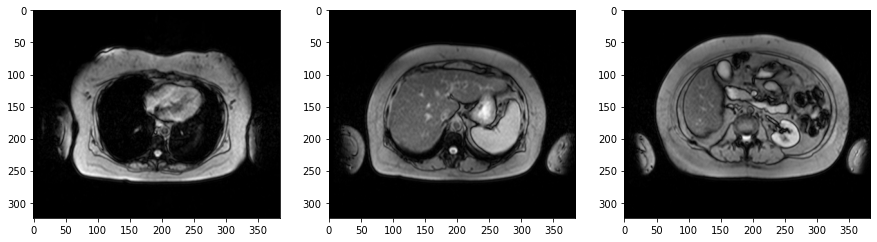

In [53]:
# CHECK IF REVERSED
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1, 3, 1)
plt.imshow(combined[:,:,0],cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(combined[:,:,8],cmap='gray')
fig.add_subplot(1, 3, 3)
plt.imshow(combined[:,:,16],cmap='gray')
plt.show

# BOTTOM OF LIVER SHOULD BE ON THE LEFT

(324, 384, 25)


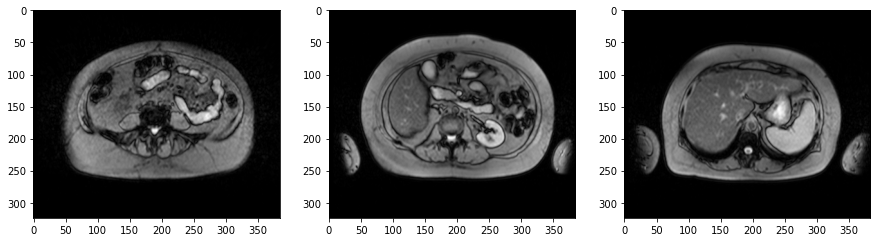

In [54]:
# IF REVERSED, RUN THIS
combined = combined[:,:,::-1]

# CHECK IT FIXED IT
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1, 3, 1)
plt.imshow(combined[:,:,0],cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(combined[:,:,8],cmap='gray')
fig.add_subplot(1, 3, 3)
plt.imshow(combined[:,:,16],cmap='gray')
plt.show
print(combined.shape)

In [55]:
# RESIZE IMAGE IF NEEDED
img_inter = cv2.resize(combined, (224, 224), interpolation = cv2.INTER_LINEAR)
img_inter.shape

(224, 224, 25)

In [56]:
affine = np.eye(4)
affine[0][0] = upper_ps[0]
affine[1][1] = upper_ps[1]
affine[2][2] = slice_gap

affine

array([[ 1.30208337,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.30208337,  0.        ,  0.        ],
       [ 0.        ,  0.        , 10.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [57]:
print(patient_id + ' saved')
new_im = nib.Nifti1Image(np.flip(np.rot90(img_inter), 1), affine = affine)
print(new_im.shape)
nib.save(new_im, os.path.join(nii_output, patient_id))

f_7325 saved
(224, 224, 25)


In [64]:
# IF NORMAL

dicom_im = dcmread(series[0]).pixel_array

dicom_arr = np.zeros((dicom_im.shape[0], dicom_im.shape[1], len(series)))

num = -1
for i in series:
    num += 1
    dicom = dcmread(i).pixel_array
    dicom_arr[:,:,num] = dicom
    
dicom_arr.shape

(312, 384, 18)

<function matplotlib.pyplot.show(close=None, block=None)>

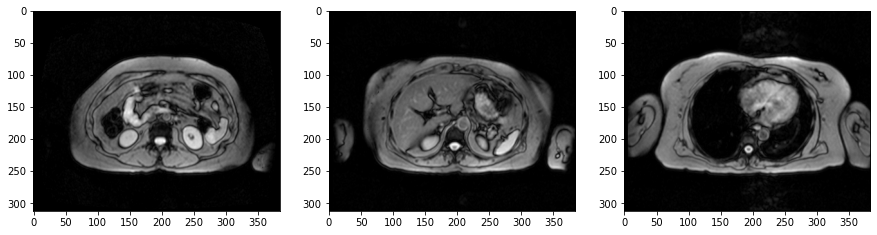

In [65]:
# CHECK IF REVERSED
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1, 3, 1)
plt.imshow(dicom_arr[:,:,0],cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(dicom_arr[:,:,8],cmap='gray')
fig.add_subplot(1, 3, 3)
plt.imshow(dicom_arr[:,:,15],cmap='gray')
plt.show

# BOTTOM OF LIVER SHOULD BE ON THE LEFT

(192, 192, 27)


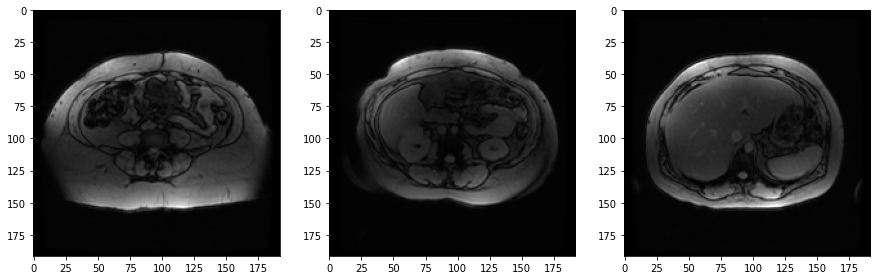

In [200]:
# IF REVERSED, RUN THIS
dicom_arr = dicom_arr[:,:,::-1]

# CHECK IT FIXED IT
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1, 3, 1)
plt.imshow(dicom_arr[:,:,0],cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(dicom_arr[:,:,8],cmap='gray')
fig.add_subplot(1, 3, 3)
plt.imshow(dicom_arr[:,:,16],cmap='gray')
plt.show
print(dicom_arr.shape)

In [66]:
# RESIZE IMAGE IF NEEDED
img_inter = cv2.resize(dicom_arr, (224, 224), interpolation = cv2.INTER_LINEAR)
img_inter.shape

(224, 224, 18)

In [67]:
affine = np.eye(4)
affine[0][0] = upper_ps[0]
affine[1][1] = upper_ps[1]
affine[2][2] = slice_gap

affine

array([[ 1.30208337,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.30208337,  0.        ,  0.        ],
       [ 0.        ,  0.        , 10.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [68]:
print(patient_id + ' saved')
new_im = nib.Nifti1Image(np.flip(np.rot90(img_inter), 1), affine = np.eye(4))
print(new_im.shape)
nib.save(new_im, os.path.join(nii_output, patient_id))

f_8391 saved
(224, 224, 18)


In [68]:
data_table['Patient ID'].append(patient_id)
data_table['original slice spacing'].append('10')
data_table['spacing between stitching'].append('0')

df = pd.DataFrame(data_table)
df

,Patient ID,original slice spacing,spacing between stitching
0,f_4032,10,0
1,f_4069,10,0


In [ ]:
df.to_excel('***.xlsx', index=False)

In [5]:
# remove files that aren't echo 5

for i in patient_folders:
    path = os.path.join(sot_dir, i)
    
    dcm_list = []

    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".dcm"):
                dcm_list.append(os.path.join(root, file))
                
    for ii in dcm_list:
        dcm = dcmread(ii)
        echo_num = dcm.EchoNumbers
        
        if echo_num != 5:
            os.remove(ii)